<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/Deep-Neural-Network/machine_learning_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **심층 신경망**
- 렐루 함수, 옵티마이저

## **시작하기 전에**
1. 인공 신경망은 확실히 로지스틱 회귀보다 성능 좋음
2. <font color="#ffff00">딥러닝</font>(심층 신경망): 인공 신경망은 층을 많이 추가 가능
3. 딥러닝으로 성능을 더 높여보자!

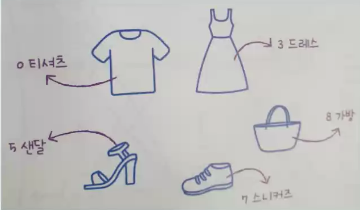

## **데이터 준비**

패션 MNIST 데이터셋 로딩

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target =  train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

> 1. 이미지 픽셀값: 0~255 범위를 <font color="#ff0000">0 ~ 1</font> 사이로 변환
2. 28x28 크기의 2차원 배열을 <font color="#ff0000">784 크기</font>의 1차원 배열로 변환
3. 훈련 세트를 <font color="#ff0000">훈련 세트와 검증 세트</font>로 분류

## **2개의 층**
- 기존 신경망 모델에 **<font color="#ffff00">밀집층 추가</font>**
- **<font color="#ffff00">은닉층</font>**(hidden layer): 입력층과 출력층 사이에 있는 모든 층

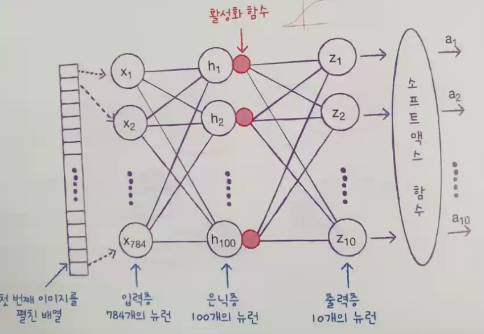

> <font color="#ff0000">활성화 함수</font>(주황색 원)]
- 신경망 층의 선형 방정식의 계산 값에 적용하는 함수
- 시그모이드 함수, 렐루(ReLU) 함수 등
- 출력층에서는 시그모이드 함수, 소프트맥스 함수

## **시그모이드 함수**

많이 사용하는 활성화 함수

뉴런의 출력 z값을 0과 1사이로 압축

<font color="#ffff00">첫 번째 층</font>은 input_shape 매개변수로 <font color="#ffff00">입력 크기</font> 지정


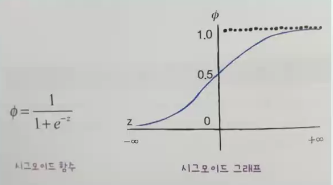

In [3]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

[dense1] <font color="#ff0000">은닉층</font>
- <font color="#ff0000">100개의 뉴런</font>을 가진 밀집층: 특별한 기준 없음. 출력층 뉴런보다는 많아야 함.
- sigmoid 활성화 함수 사용 / 입력 크기 (784), 지정 / name 매개변수 사용 가능 (이름 지정)

[dense2] 출력층
- 10개 클래스 분류: <font color="#ff0000">10개 뉴런</font> 사용 / softmax 활성화 함수 사용

## **심층 신경망 만들기(deep neural, network, <font color="#ff0000">DNN</font>)**

dense1, dense2 객체를 Sequential 클래스에 추가

출력층을 가장 <font color="#ffff00">마지막에 두어야 함

In [4]:
model = keras.Sequential([dense1, dense2])

> - 딥러닝: 층을 추가하여 입력 데이터에 대해 연속적인 학습 진행
- 2개 이상의 층 추가 가능

모델에 들어있는 층 순서대로 나열

층마다 층 이름, 클래스, 출력 크기, 모델 파라미터 개수 출력

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


> 이름 지정하지 않으면 자동으로 'dense'라고 붙임

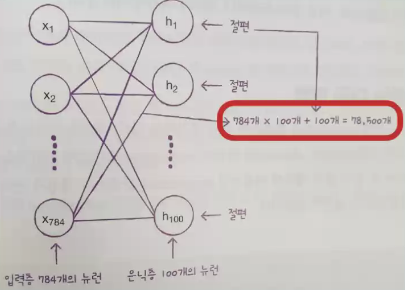

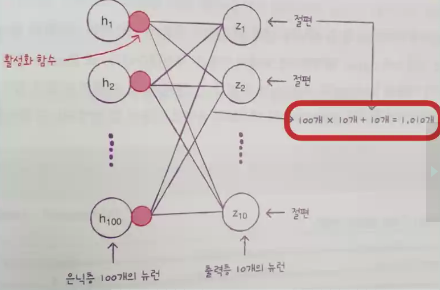

> Non-trainable params: 훈련되지 않은 파라미터 수

## **심층 신경망 만들기**
보통 Sequential 클래스의 생성자 안에서 바로 Dense 클래스 객체 생성

In [6]:
# name에 한글, 공백 들어가면 오류남
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='FashionMNISTmodel')

In [7]:
model.summary()

Model: "FashionMNISTmodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


> 모델 이름과 층 이름 지정
  - : 여러 모델과 많은 층을 사용할 때 구분이 쉽다!

[단점]
- 생성자가 매우 길어짐
- 조건에 따라 층 추가 불가

**<font color="#ffff00">add</font>() 메서드 사용**
- Sequential 클래스에서 층 추가할 때 <font color="#ffff00">가장 널리 사용</font>
- 한눈에 추가되는 층을 볼 수 있음
- 프로그램 실행 시 <font color="#ffff00">동적으로 층 선택 가능

In [8]:
model = keras.Sequential(name='FashionMNISTmodel')
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'))
model.add(keras.layers.Dense(10, activation='softmax', name='output'))

In [9]:
model

In [10]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5570 - accuracy: 0.8098
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4061 - accuracy: 0.8542
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3717 - accuracy: 0.8662
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3483 - accuracy: 0.8741
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3312 - accuracy: 0.8796
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3169 - accuracy: 0.8846
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3055 - accuracy: 0.8892
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2954 - accuracy: 0.8928
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2876 - accuracy: 0.8950
Epoch 10/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.279

## **렐루(ReLU) 함수**
심층 신경망, 특히 <font color="#ffff00">이미지 처리</font>에서 좋은 성능

<font color="#ffff00">max(0, z)</font>: z가 0보다 크면 z 출력, 0보다 작으면 0 출력

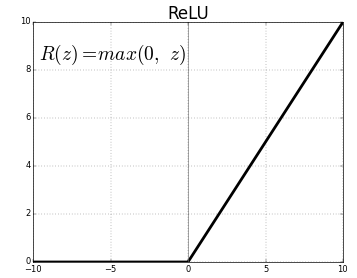

## **Flatten + ReLU**
기존에는 28x28 크기를 넘파이 배열의 reshape() 메서드로 1차원으로 펼쳤음

<font color="#ffff00">동일한 역할</font>을 해 주는 keras에서 Flatten 클래스로 제공

입력층과 은닉층 사이에 추가하기 때문에 <font color="#ffff00">Flatten 층</font>이라 부름

In [11]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
# model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

> - input_shape를 Flatten 층에서 <font color="#ff0000">(28, 28)</font>로 지정
- 은닉층의 활성화 함수 <font color="#ff0000">relu</font>로 지정

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## **DNN 모델 다시 훈련**

- 훈련 데이터 다시 준비: reshape() 사용하지 않음


In [13]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

- 모델 컴파일 및 훈련

In [25]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2704 - accuracy: 0.9048
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2663 - accuracy: 0.9086
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2581 - accuracy: 0.9107
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2543 - accuracy: 0.9117
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2507 - accuracy: 0.9133
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2454 - accuracy: 0.9161
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2426 - accuracy: 0.9168
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2379 - accuracy: 0.9191
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2326 - accuracy: 0.9195
Epoch 10/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.227

> - epoch 10 지정: <font color="#ff0000">90.4%</font>
- 시그모이드 함수보다 성능 조금 향상

- 검증 세트 성능 확인 (evaluate)


In [15]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3829 - accuracy: 0.8780


[0.382947713136673, 0.878000020980835]

> - 검증 세트임에도 <font color="#ff0000">87.9%</font> 향상!
- 이전 pdf(은닉층 사용하지 않는 경우) 83.8%

## **기본 경사 하강법 옵티마이저**
<font color="#ffff00">모멘텀 최적화</font>(momentum optimization)
- momentom 매개변수: 가속도를 기본적으로 0.9이상 지정
- 그레이디언트를 가속도처럼 사용한다고 함

<font color="#ffff00">네스테로프</font> 모멘텀 최적화 (nesterov momentum optimazion)
- nesterov 매개변수를 True로 지정
- 모멘텀 최적화를 <font color="#ffff00">2번 반복</font>
- 대부분 기본 확률적 경사 하강법보다 <font color="#ffff00">더 나은 성능</font> 제공

In [28]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

## **적응적 학습률 옵팀이저**

적응적 학습률 (adaptive learning rate)
- 모델이 최적점에 가까이 갈수록 <font color="#ffff00">학습률 낮춤</font>
- 안정적으로 <font color="#ffff00">최적점에 수렴</font>
- 학습률 매개변수를 튜닝하는 수고를 덜 수 있음
- 대표: Adarad, RMSprop

In [20]:
adgrad = keras.optimizers.Adagrad()
model.compile(optimizer=adgrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

rmsprop =  keras.optimizers.RMSprop()
model.compile(optimizer = rmsprop, loss='sparse_categorical_crosstropy', metrics='accuracy')

## **Adam 옵티마이저**
모멘텀 최적화와 RMSprop<font color="#ffff00"> 장접을 접목</font>

맨 처음 시도해볼 수 있는 <font color="#ffff00">좋은</font> 알고리즘

적응형 학습률의 learning_rate 매개변수 기본값은 모두 <font color="#ffff00">0.001</font>

In [33]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

> 일단 모델 다시 생성!

In [36]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4081 - accuracy: 0.8532
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3582 - accuracy: 0.8706
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3290 - accuracy: 0.8792
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3073 - accuracy: 0.8868
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2917 - accuracy: 0.8921
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2790 - accuracy: 0.8975
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.8995
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9038
Epoch 9/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2508 - accuracy: 0.9067
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.242

In [37]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8896


[0.3402789533138275, 0.8895833492279053]